## B31MV - Lab6 Week 11 ##

https://colab.research.google.com/drive/1tX1WG05bOiElL12TRo4FJzdKJacEMZOI#scrollTo=W2o63b1uA8IE&uniqifier=2

**RANSAC (Random Sample Consensus)**

 is a robust estimation technique that is used to fit a model
to data that contains a significant proportion of outliers.

**Example - Plane Fitting**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [3]:
## Plotting 3D Space with the points, and the plane in them. ##
# Utility functions (They help with the algorithm.)

# Defining the 3D Points plotting function.
def plot_3d_points(points, title="3D Points Visualization", color='b', marker='o'):
    """
    Plot 3D points in a scatter plot.

    :param points: Nx3 numpy array containing (X, Y, Z) coordinates.
    :param title: Title of the plot.
    :param color: Color of the points.
    :param marker: Marker style for the points.
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, marker=marker, alpha=0.7)

    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title(title)

    plt.show()


# Plotting the plane that is fit within the space.
def plot_results(points, inliers, plane, title="RANSAC Plane Fitting"):
    """Plot 3D points and the fitted plane."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Extract inliers and outliers
    inlier_points = points[inliers]
    outlier_points = np.delete(points, inliers, axis=0)

    # Scatter plot points
    ax.scatter(outlier_points[:, 0], outlier_points[:, 1], outlier_points[:, 2], c='red', marker='x', label="Outliers")
    ax.scatter(inlier_points[:, 0], inlier_points[:, 1], inlier_points[:, 2], c='blue', marker='o', label="Inliers")

    # Plot the fitted plane
    a, b, c, d = plane
    xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
    zz = (-a * xx - b * yy - d) / c
    ax.plot_surface(xx, yy, zz, color='green', alpha=0.5, edgecolor='none')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()
 

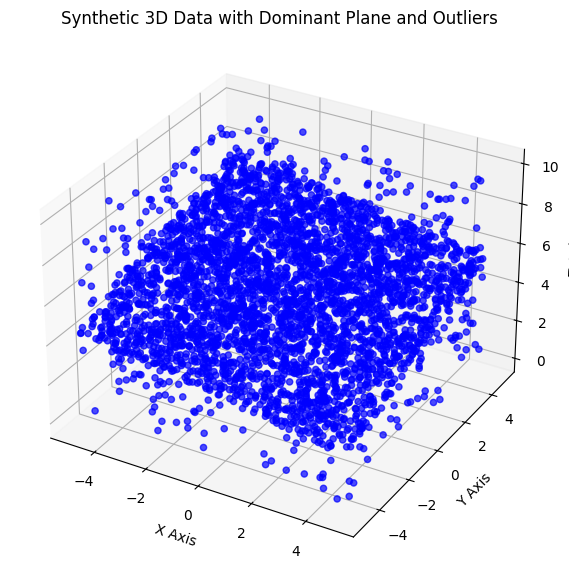

In [4]:
# Generate synthetic 3D data
# WHY?
def generate_3d_data(num_points=500, num_outliers=100): #default split inliers - outliers
    """Generate synthetic 3D data with a dominant plane and outliers."""
    # Plane equation: ax + by + cz + d = 0
    a, b, c, d = 0.2, -0.3, 1, -5  # Example plane: Slightly tilted
    noise_std = 0.05  # Noise level for inliers

    # Generate inliers
    x_vals = np.random.uniform(-5, 5, num_points)
    y_vals = np.random.uniform(-5, 5, num_points)
    z_vals = (-a * x_vals - b * y_vals - d) / c + np.random.normal(0, noise_std, num_points)

    # Generate outliers
    x_outliers = np.random.uniform(-5, 5, num_outliers)
    y_outliers = np.random.uniform(-5, 5, num_outliers)
    z_outliers = np.random.uniform(0, 10, num_outliers)  # Random height

    # Combine inliers and outliers
    x_vals = np.concatenate((x_vals, x_outliers))
    y_vals = np.concatenate((y_vals, y_outliers))
    z_vals = np.concatenate((z_vals, z_outliers))

    points = np.vstack((x_vals, y_vals, z_vals)).T
    return points

# 2500 inliers, 1200 outliers
points = generate_3d_data(2500, 1200)
plot_3d_points(points, title="Synthetic 3D Data with Dominant Plane and Outliers")

In [ ]:
# RANSAC Plane Fitting
def ransac_plane_fitting(points, threshold=0.1, max_iterations=1000):
    """Find the best-fitting plane using RANSAC."""
    best_plane = None
    best_inliers = []

    for _ in range(max_iterations):
        # Randomly sample 3 points
        sample = points[np.random.choice(points.shape[0], 3, replace=False)]
        p1, p2, p3 = sample

        # Compute plane normal using cross product
        normal = np.cross(p2 - p1, p3 - p1)
        if np.linalg.norm(normal) == 0:
            continue  # Degenerate case, skip
        normal = normal / np.linalg.norm(normal)  # Normalize
        a, b, c = normal
        d = -np.dot(normal, p1)  # Plane equation: ax + by + cz + d = 0

        # Compute distances to the plane
        distances = np.abs(a * points[:, 0] + b * points[:, 1] + c * points[:, 2] + d) / np.linalg.norm(normal)

        # Count inliers
        inliers = np.where(distances < threshold)[0]

        if len(inliers) > len(best_inliers):  # Update best model
            best_inliers = inliers
            best_plane = (a, b, c, d)

    return best_plane, best_inliers
ransac_plane, inliers = ransac_plane_fitting(points)
# Plot RANSAC result
plot_results(points, inliers, ransac_plane, title="RANSAC Plane Fitting")
inliers_points = points[inliers]
outliers_points = np.delete(points, inliers, axis=0)
print("Number of inliers:", len(inliers_points))
print("Number of outliers:", len(outliers_points))

## ... DEVAMI GELECEK ... ##